# Reading (Mount) Data melalui Google Sheet

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
sheet_id = '1yvupyDFzJLjKU2aB46iTT3Sh4hGxqqPzFbWl1kCxq-s'
sheet_name = 'games_sales'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
game_sales = pd.read_csv(url)
game_sales

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [59]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [60]:
games_changed = game_sales.copy()

# Mengubah Tipe Data Column 'Released' menjadi Datetime

In [61]:
games_changed['Release'] = pd.to_datetime(games_changed['Release'])
games_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [62]:
games_cleaned = games_changed.drop_duplicates()
games_cleaned.head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


In [63]:
for col_name in ['Series', 'Developer', 'Publisher']:
    print(games_cleaned[col_name].value_counts(), '\n')

Command & Conquer        5
StarCraft                4
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

Blizzard Entertainment             8
Maxis                              6
Paradox Development Studio         5
id Software                        4
Westwood Studios                   4
                                  ..
Kojima Productions                 1
Edmund McMillen & Florian Himsl    1
Landfall Games                     1
Keen Software House                1
Microsoft                          1
Name: Developer, Length: 109, dtype: int64 

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup 

### 1. Which Game is the oldest and newest in that Dataset?



In [64]:
sorted_release = games_cleaned.groupby('Release', as_index=False)['Name'].sum()
sorted_release

,Release,Name
0,1984-12-01,Hydlide
1,1985-06-01,Where in the World Is Carmen Sandiego?
2,1985-11-01,International Karate
3,1988-01-01,Tetris
4,1988-08-01,Last Ninja 2
...,...,...
125,2019-04-01,Mordhau
126,2020-08-01,Fall Guys
127,2020-09-01,Crusader Kings III
128,2020-12-01,Cyberpunk 2077


In [65]:
# sorted_release = games_cleaned.sort_values(by=['Release'], ascending=True)
# sorted_release

oldest game to had been Released  = Hydlide

Newest Game to had been Released = Valheim

### 2. Which Publisher published most of the games?

In [66]:
agg_publisher = games_cleaned.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


<Axes: xlabel='Publisher', ylabel='Name'>

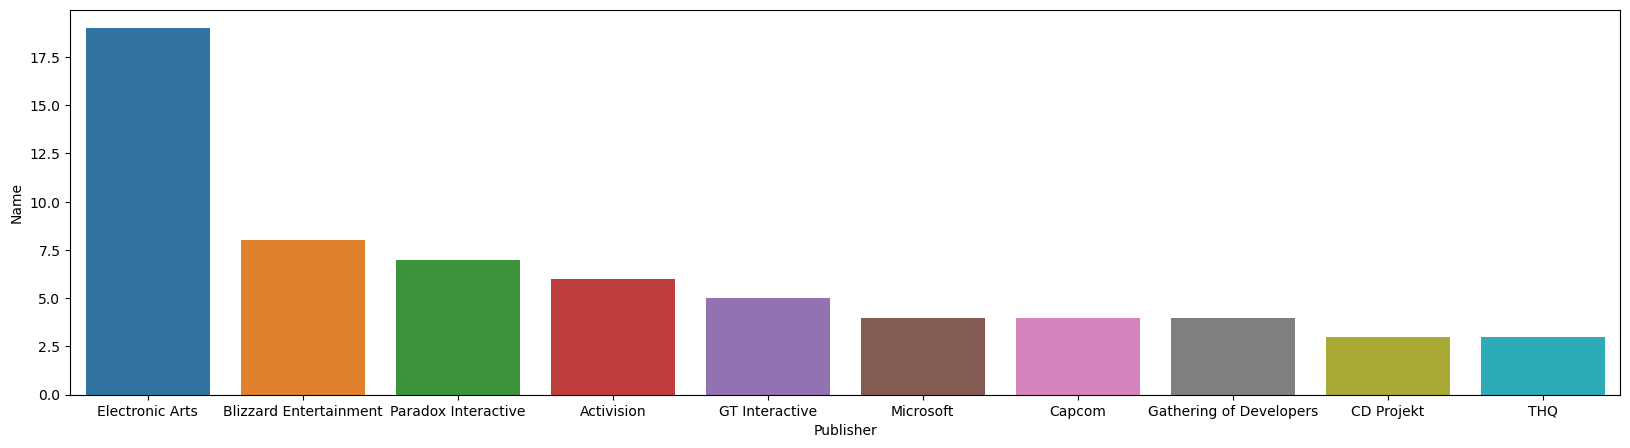

In [67]:
plt.rcParams['figure.figsize'] = (20,5)
sns.barplot(x='Publisher', y='Name', data=agg_publisher.sort_values('Name', ascending=False).head(10))

In [68]:
# top_publisher = games_cleaned['Publisher'].value_counts().loc[lambda x : x>=4]
# top_publisher
# df['your_column'].value_counts().loc[lambda x : x>1]

Electronic Arts have published most of the games

### 3. Which Developer developed most of the games?

In [69]:
# top_dev = games_cleaned.groupby("Developer")["Name"].count().sort_values(ascending=False)
top_dev = games_cleaned.groupby('Developer', as_index=False)['Name'].count().sort_values(by='Name',ascending=False).dropna()
top_dev

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


<Axes: xlabel='Developer', ylabel='Name'>

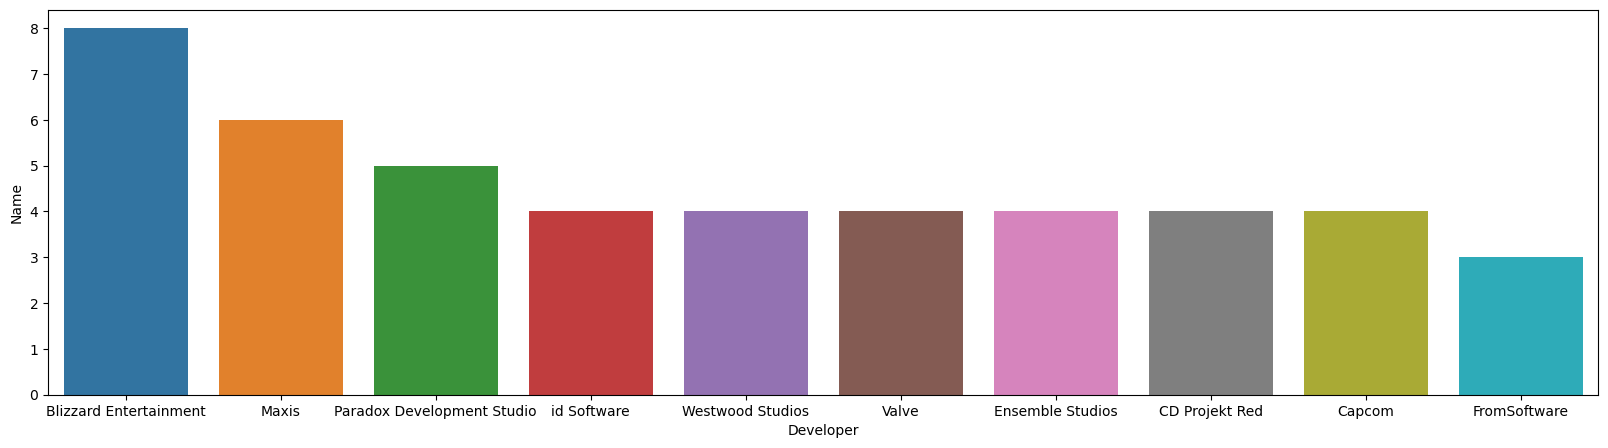

In [70]:
sns.barplot(x='Developer', y='Name', data=top_dev.sort_values('Name', ascending=False).head(10))

Blizzard Entertainment have developed most of the games

### 4. Which Series has the most sales?

In [71]:
# games_cleaned.sort_values(by=['Sales'], ascending=False).dropna()

In [75]:
series_sales = games_cleaned.groupby('Series', as_index=False).agg({"Sales" : "sum", "Name" : "nunique"})
series_sales.sort_values('Sales', ascending=False).head(10)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
68,StarCraft,19.0,4
76,The Witcher,16.0,3
61,RollerCoaster Tycoon,14.0,2
12,Civilization,14.0,4
35,Guild Wars,11.0,2


<Axes: xlabel='Series', ylabel='Sales'>

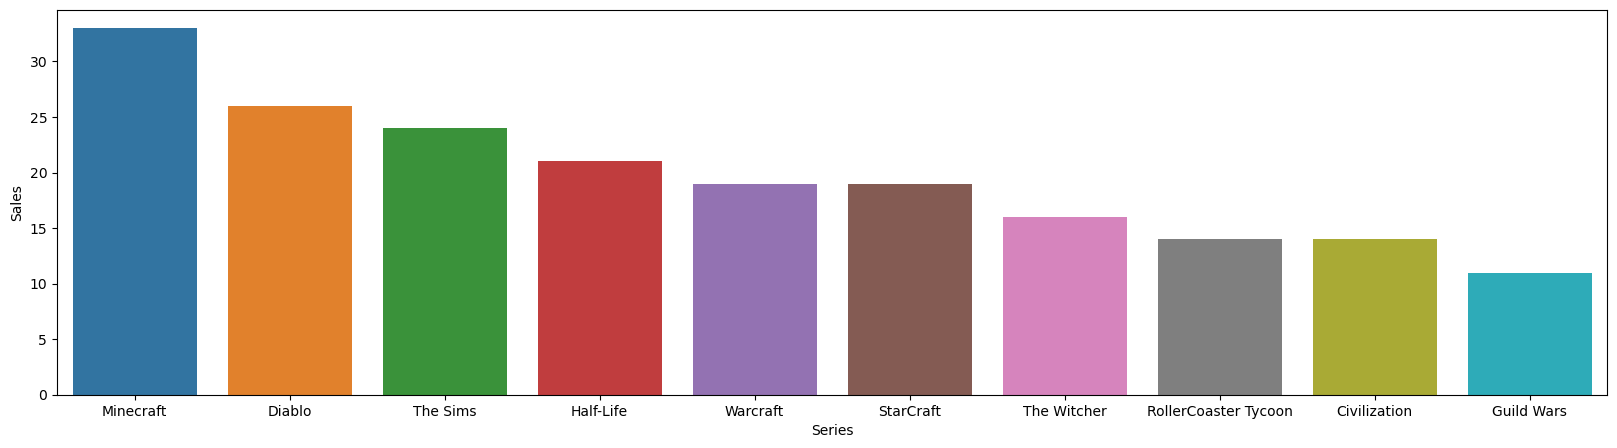

In [79]:
sns.barplot(x='Series', y='Sales', data=series_sales.sort_values('Sales', ascending=False).head(10))

Minecraft is the most saled series

### 5. Which Series have the most games?

In [83]:
series_counts = games_cleaned.groupby('Series')['Name'].count().sort_values(ascending=False).loc[lambda x : x>=3]
series_counts

Series
Command & Conquer    5
StarCraft            4
Age of Empires       4
Civilization         4
Dark Souls           3
SimCity              3
Resident Evil        3
Warcraft             3
The Witcher          3
The Sims             3
Diablo               3
Name: Name, dtype: int64

<Axes: xlabel='Series', ylabel='Name'>

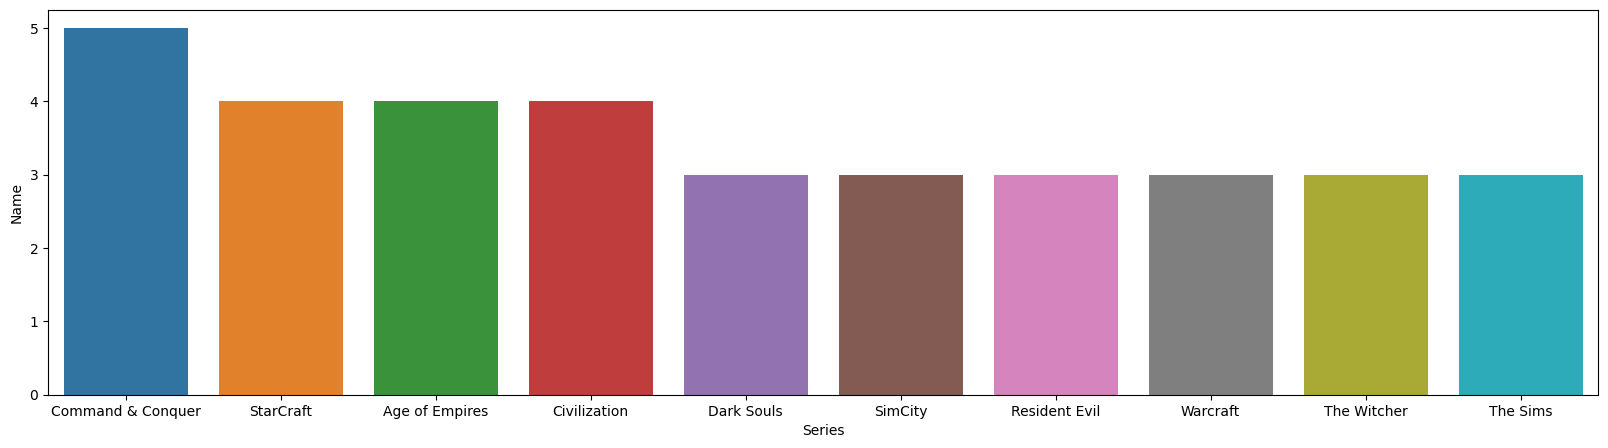

In [84]:
sns.barplot(x='Series', y='Name', data=series_sales.sort_values('Name', ascending=False).head(10))

Command & Conquer have the most games in series

## Genre Chart

In [ ]:
print(game_sales['Genre'].value_counts())

Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64


In [ ]:
# Change Dtype
games_fixed = games_cleaned.copy()
games_fixed

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


In [ ]:
dict_typo = {'Action role-playing' : 'Action role-playing',
             'Action role-playing game' : 'Action role-playing',
             'Action role-playing, hack and slash' : 'Hack & Slash',
             'Turn-based strategy' : 'Turn-based strategy',
             'Turn-based strategy, 4X' : 'Turn-based strategy',
             'Action-adventure, platformer' : 'Platformer'}
games_fixed = games_fixed.replace(dict_typo)
print(games_fixed['Genre'].value_counts())

Real-time strategy                            24
First-person shooter                          19
Action role-playing                           13
Construction and management simulation         9
Role-playing game                              8
City-building                                  6
Action-adventure                               6
MMORPG                                         6
Survival                                       5
Turn-based strategy, 4X                        4
Action                                         4
Life simulation                                3
Fighting                                       3
Third-person shooter, survival horror          3
Tactical shooter                               3
Business simulation                            3
God game                                       3
City-building game                             3
Grand strategy                                 3
Adventure                                      2
Battle royale       

In [ ]:
group_genre = games_cleaned.groupby('Genre', as_index=False,)['Sales','Publisher'].sum()
group_genre

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_388160\180165413.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_genre = games_cleaned.groupby('Genre', as_index=False,)['Sales','Publisher'].sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_388160\180165413.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_genre = games_cleaned.groupby('Genre', as_index=False,)['Sales','Publisher'].sum()


,Genre,Sales
0,Action,4.0
1,Action role-playing,58.1
2,Action role-playing game,1.1
3,"Action role-playing, hack and slash",1.2
4,Action-adventure,31.7
...,...,...
56,Trivia game,1.0
57,Turn-based strategy,2.5
58,"Turn-based strategy, 4X",14.0
59,Vehicle simulation,8.0
